# IMDB Movies Sentiment Analysis using Machine Learning

Dataset url = https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## Data Cleaning 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
df = pd.read_csv('IMDB Dataset.csv')
df.head(11)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [7]:
print("No. of Row :", df.shape[0])
print("No. of Columns :", df.shape[1])

No. of Row : 50000
No. of Columns : 2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


==============Data Summary===============

           Null Values
review               0
sentiment            0

==========Class Distribution============
           Count  Percentage
sentiment                   
positive   25000        50.0
negative   25000        50.0

==============Pie Chart=================


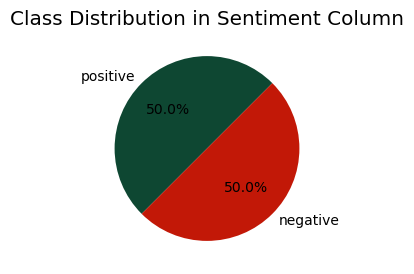

In [10]:
null_values = df.isnull().sum()

class_distribution = df['sentiment'].value_counts()
class_percentage = (df['sentiment'].value_counts(normalize=True)*100)

class_summary = pd.DataFrame({
    'Null Values': null_values
})

class_distribution_data = pd.DataFrame({
    'Count': class_distribution,
    'Percentage': class_percentage
})

print("==============Data Summary===============\n")
print(class_summary)
print("\n==========Class Distribution============")
print(class_distribution_data)
print('\n==============Pie Chart=================')
plt.figure(figsize=(3,3))
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=45, colors=['#0E4732','#C21807'])

plt.title('Class Distribution in Sentiment Column')
plt.ylabel('')
plt.show()

In [11]:
print(df['review'].iloc[1])
print(df['sentiment'].iloc[1])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.
p

In [12]:
for i in range(2):
    print('Reviews:',[i])
    print('\n',df['review'].iloc[i],'\n')
    print('Sentiment:', df['sentiment'].iloc[i], '\n\n')

Reviews: [0]

 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is

In [13]:
duplicated_count = df.duplicated().sum()
print("No. of Duplicates", duplicated_count)

df = df.drop_duplicates('review')

duplicated_count = df.duplicated().sum()
print("No. of Duplicates after dropping", duplicated_count)

No. of Duplicates 418
No. of Duplicates after dropping 0


## PreProcessing Text

In [15]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from wordcloud import WordCloud

In [16]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r'https\S+|www\S+|http\S+', '', text, flags = re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if w not in stop_words]
    return " ".join(filtered_text)


In [17]:
df['review'] = df['review'].apply(preprocess_text)
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [19]:
df['review'] = df['review'].apply(lambda x: stemming(x))

In [20]:
print("Replace Postive and Negative value into 1 and 0")
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0}).astype(int)

df.head()

Replace Postive and Negative value into 1 and 0


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


### Factorizing the Data And Modeling

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
X = df['review']
y = df['sentiment']
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)
print('Shape of X_train', (X_train.shape))
print('Shape of X_test', (X_test.shape))
print('Shape of y_train', (y_train.shape))
print('Shape of y_test', (y_test.shape))

Shape of X_train (34707, 221700)
Shape of X_test (14875, 221700)
Shape of y_train (34707,)
Shape of y_test (14875,)


In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)

print("===============Logistic Regression================")
print("\nTest Accuracy: {:.2f}%\n".format(logreg_acc*100))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, logreg_pred))
print("\nClassification Report: ")
print(classification_report(y_test, logreg_pred))

===============Logistic Regression================

Test Accuracy: 89.41%

Confusion Matrix: 
[[6522  882]
 [ 694 6777]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7404
           1       0.88      0.91      0.90      7471

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



In [25]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_acc = accuracy_score(mnb_pred, y_test)

print("=============== Naives Bayes Report================")
print("\nTest Accuracy: {:.2f}%\n".format(mnb_acc*100))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, mnb_pred))
print("\nClassification Report: ")
print(classification_report(y_test, mnb_pred))

=============== Naives Bayes Report================

Test Accuracy: 86.38%

Confusion Matrix: 
[[6453  951]
 [1075 6396]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7404
           1       0.87      0.86      0.86      7471

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



In [27]:
import joblib

joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(mnb, 'mnb_model.pkl')

saved_models = ['logreg_model.pkl', 'mnb_model.pkl']

for models in saved_models:
    print("Saved Models:", models)

Saved Models: logreg_model.pkl
Saved Models: mnb_model.pkl


In [29]:
joblib.dump(vect, 'vectorizer.pkl')

['vectorizer.pkl']

In [30]:
logreg_model = joblib.load('logreg_model.pkl')
vectorizer = joblib.load('vectorizer.pkl') 


reviews = [
    "This movie was amazing, I loved the storyline and acting!",
    "I didn't enjoy the movie. It was too slow and boring.",
    "The visuals were stunning, but the plot was weak.",
    "The quality was really bad I am disappointed"
]

reviews_vectorized = vectorizer.transform(reviews)


predictions = logreg_model.predict(reviews_vectorized)
sentiment = ['Positive' if pred == 1 else 'Negative' for pred in predictions]
for review, sentiment_pred in zip(reviews, sentiment):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_pred}\n")

Review: This movie was amazing, I loved the storyline and acting!
Predicted Sentiment: Positive

Review: I didn't enjoy the movie. It was too slow and boring.
Predicted Sentiment: Negative

Review: The visuals were stunning, but the plot was weak.
Predicted Sentiment: Negative

Review: The quality was really bad I am disappointed
Predicted Sentiment: Negative

